$$ \bf{EE0404\ SIGNAL\ PROCESSING\ APPLICATIONS} $$
$$ \ $$
$$ $$
$$ \text{Lecture 10} $$

$$ \text{Practical I.I.R. filter design}
 $$

$$ \text{ By: Güray GÜRKAN, PhD} $$

$$ Aug\ 2016 $$

In [2]:
% pylab inline
from scipy.signal import *
def pol2cart(r,theta):
    return r*cos(theta), r*sin(theta)

thetas = linspace(0,2*np.pi,100)
[xx, yy]= pol2cart(1,thetas)

Populating the interactive namespace from numpy and matplotlib


# Overiew

* Analog Butterworth Filters
* Bilinear transformation: Analog to Digital
* Design using Python
* Implementation 


# Predefined Pole Locations

- Continuous time filters have specific pole locations and frequency response characteristics.

- There exists many studies on Analog Filter design using polynomials.

- Digital Filter design only maps $s$-plane to $z$-plane (or variable).


# Analog Butterworth filters

- Take their name from ...
- Also known as maximally flat magnitude filters
- In $s$-plane (continuous time), low pass filter (with $\omega_c =1$ rad/s) forms the prototype of the filter.
- Continuous time form of the Nth order Butterworth Lowpass filter can be generated by:
        B, A = butter(N, wc,analog = True)
* B and A are the coefficient vectors of descending orders of variable s. 
* $\omega_c$ can have values from 0 to infinity.


## Example 1:
    
- Generate a 1st order Analog Butterworth filter with $\omega_c $= 10 rad/s. Refering to numerator and denumarator polynomials, we will plot the pole-zero map of the system.

In [3]:
B,A = butter(1,10,analog=True)
print 'B=',B
print 'A=',A

B= [ 10.]
A= [  1.  10.]


The outputs of the *butter* function for continuous time gives the numerator and denumerator coefficients of powers of $s$ in descending order. That is, the right most side of the vector elements correspond to the coefficients of $s^0$. Thus, the generated system is:

$$ H(s) = \frac{10s^0}{1s^1 + 10s^0}=\frac{10}{s+10} $$

with $\omega_c$ = 10 rad/s.

The system has a single pole located at $s=-10$.

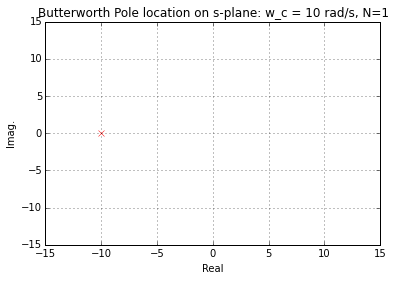

In [4]:
plot(-10,0,'rx')
axis([-15,15,-15,15])
grid(True)
xlabel('Real')
ylabel('Imag.')
title('Butterworth Pole location on s-plane: w_c = 10 rad/s, N=1')


## Example 2

Also generate 2nd and 3rd order Analog Butterworth filter with  $\omega_c$ = 10 rad/s and plot the pole-zero map of the systems.

In [5]:
B2,A2 = butter(2,10,analog=True)
B3,A3 = butter(3,10,analog=True)
print 'B2=',B2
print 'A2=',A2
print "and"

print 'B3=',B3
print 'A3=',A3

B2= [ 100.]
A2= [   1.           14.14213562  100.        ]
and
B3= [ 1000.]
A3= [   1.   20.  200. 1000.]


Generated systems are:

$$H_2(s) = \frac{100}{s^2 +14.14s+100} $$

$$H_3(s) = \frac{1000}{s^3+20s^2 +200s+1000} $$

We can find the pole locations by deriving the roots of the denumerator polynomials. We can use *roots()* command.

In [6]:
polesH2 = roots(A2)
polesH3 = roots(A3)
print "Poles of H2 are", polesH2
print "Poles of H3 are", polesH3


Poles of H2 are [-7.07106781+7.07106781j -7.07106781-7.07106781j]
Poles of H3 are [-10.+0.j          -5.+8.66025404j  -5.-8.66025404j]


If we plot the poles, the result is interesting...

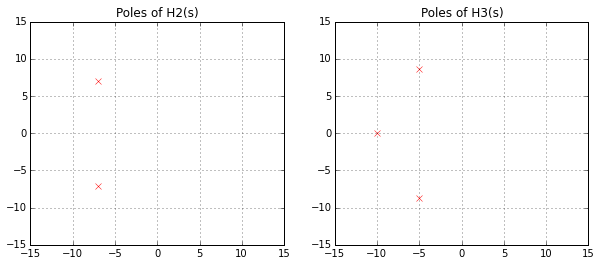

In [7]:
rcParams['figure.figsize']=(10,4)
subplot(1,2,1)
plot(real(polesH2),imag(polesH2),'rx')
axis([-15,15,-15,15])
grid(True)
title('Poles of H2(s)')
subplot(1,2,2)
plot(real(polesH3),imag(polesH3),'rx')
axis([-15,15,-15,15])
grid(True)
title('Poles of H3(s)')

If we check the norms of each pole:

In [8]:
print "Norms of H2 poles are ", abs(polesH2)
print "Norms of H3 poles are ", abs(polesH3)

Norms of H2 poles are  [ 10.  10.]
Norms of H3 poles are  [ 10.  10.  10.]


We see that they all have the same norm, meaning that
    - they have the same distance to origin
    - they are located on r =10 circle, which is the value of $\omega_c$.

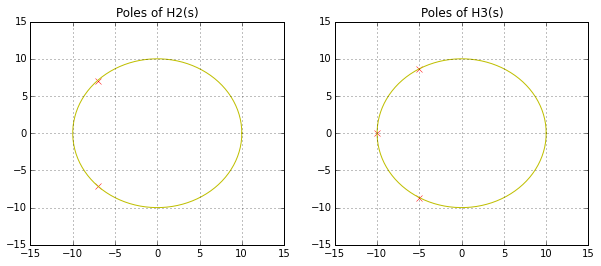

In [15]:
rcParams['figure.figsize']=(10,4)
subplot(1,2,1)
plot(real(polesH2),imag(polesH2),'rx')
hold(True)
plot(10*xx,10*yy,'-y')
axis([-15,15,-15,15])
grid(True)
title('Poles of H2(s)')
subplot(1,2,2)
plot(real(polesH3),imag(polesH3),'rx')
hold(True)
plot(10*xx,10*yy,'-y')
axis([-15,15,-15,15])
grid(True)
title('Poles of H3(s)')

### Butterworth Polynomials

- $N^{th}$ order Butterworth filter has $N$ poles on the left $s$-plane and each are seperated by $\pi /N $ radians with $s$= -1 being the symmetrical point.


- These poles are the roots of Butterworth polynomials.



- $\omega_c$ determines the circle radius of the pole locations
